# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

# Mathematical Tools

In [1]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Approximation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

Text(0, 0.5, 'f(x)')

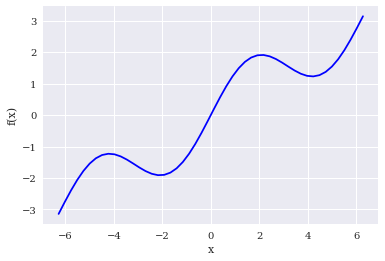

In [5]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot
# title: Example function plot
# size: 60

### Regression

#### Monomials as Basis Functions

In [6]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

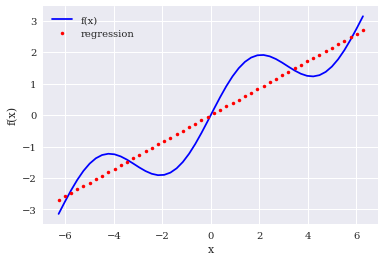

In [7]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_1
# title: Example function and linear regression
# size: 60

In [8]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

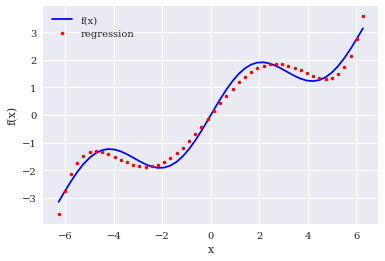

In [9]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_2
# title: Regression with monomials up to order 5
# size: 60

In [10]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

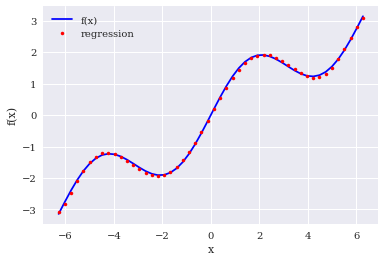

In [11]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_3
# title: Regression with monomials up to order 7
# size: 60

In [12]:
np.allclose(f(x), ry)

False

In [13]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517435

#### Individual Basis Functions

In [14]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [15]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

<ipython-input-15-6c763b92a05e>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg = np.linalg.lstsq(matrix.T, f(x))[0]


In [16]:
reg

array([ 1.13340410e-14,  5.62777448e-01, -8.88178420e-16, -5.43553615e-03])

In [17]:
ry = np.dot(reg, matrix)

Text(0, 0.5, 'f(x)')

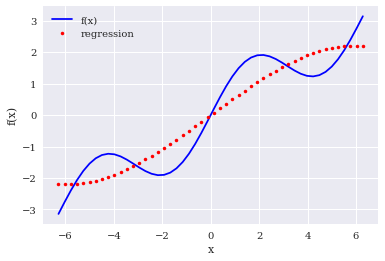

In [32]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_4
# title: Regression via least-squares function
# size: 60

In [33]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

<ipython-input-33-227fdb1d4114>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg = np.linalg.lstsq(matrix.T, f(x))[0]


Text(0, 0.5, 'f(x)')

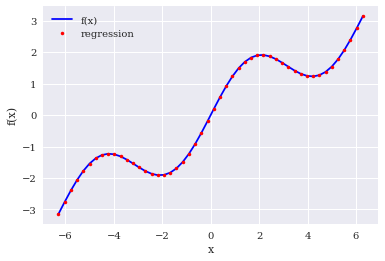

In [34]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_5
# title: Regression using individual functions
# size: 60

In [35]:
np.allclose(f(x), ry)

True

In [36]:
np.sum((f(x) - ry) ** 2) / len(x)

6.933347799794049e-33

In [37]:
reg

array([9.26243218e-17, 5.00000000e-01, 0.00000000e+00, 1.00000000e+00])

#### Noisy Data

In [24]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [25]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

Text(0,0.5,'f(x)')

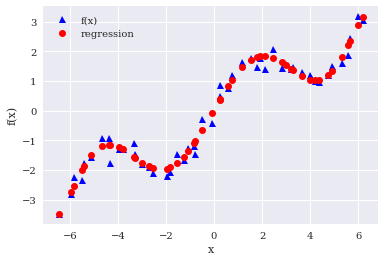

In [26]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_6
# title: Regression with noisy data
# size: 60

#### Unsorted Data

In [27]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [28]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-1.33  2.34  3.39  1.35  0.36 -5.68 -2.29 -3.37 -4.55  5.31]
[-1.64  1.89  1.45  1.65  0.54 -2.27 -1.9  -1.46 -1.29  1.83]


In [29]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

Text(0,0.5,'f(x)')

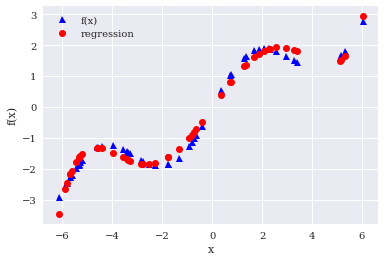

In [30]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_7
# title: Regression with unsorted data
# size: 60

#### Multiple Dimensions

In [31]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [32]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

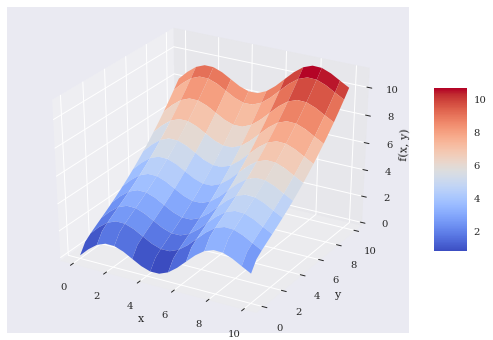

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_1
# title: Function with two parameters
# size: 60

In [34]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [1]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [36]:
model = sm.OLS(fm((x, y)), matrix).fit()

In [37]:
model.rsquared

1.0

In [38]:
a = model.params
a

array([  6.38378239e-16,   2.50000000e-01,   5.55111512e-17,
        -2.60208521e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [39]:
def reg_func(a, p):
    x, y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

In [40]:
RZ = reg_func(a, (X, Y))

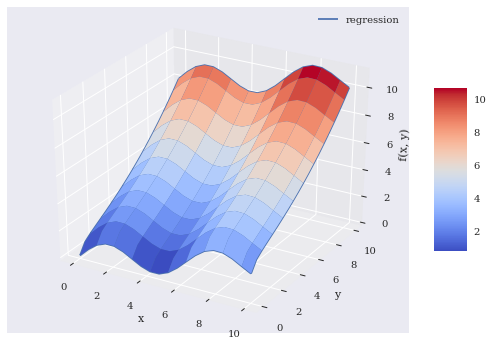

In [41]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_2
# title: Higher dimension regression
# size: 60